
# 小地域の収入推定

```Data```フォルダには、小地域の収入データ(```income_district.csv```)と国勢調査の小地域集計データが格納されています。

国勢調査の小地域集計データ（人口構成、労働力構成、住宅形態など）から、その地域の収入を推定することが考えられます。推定のための機械学習・深層学習モデルを構築しなさい。


- データを観察・理解する上で、データの構造を説明しながら、適切なデータ整形を行いなさい
- データ構造や分析結果に対して、少なくとも二つの図で可視化を行いなさい
- モデルの精度を評価し、できるだけ精度が高いモデルを得るよう、適切な特徴量エンジニアリングやモデル選定の考えもまとめなさい


In [12]:
import geopandas as gpd
import pandas as pd

# GeoJSONファイルの読み込み
geo_data = gpd.read_file('13-tokyo-all.geojson')

# 収入データと国勢調査の小地域集計データ
directory = 'Data' # ディレクトリのパス

age_data_path = f'{directory}/h27_age_df.csv'
family_data_path = f'{directory}/h27_family_df.csv'
gender_data_path = f'{directory}/h27_gender_df2.csv'
housing_data_path = f'{directory}/h27_house_df.csv'
house_info_data_path = f'{directory}/h27_house_info_df.csv'
industry_data_path = f'{directory}/h27_indusry_df.csv'
occupation_data_path = f'{directory}/h27_job_df.csv'
labor_data_path = f'{directory}/h27_labor_df.csv'
marriage_data_path = f'{directory}/h27_marriage_df.csv'
employment_status_data_path = f'{directory}/h27_work_status_df.csv'
income_data_path = f'{directory}/income_district.csv'

age_data = pd.read_csv(age_data_path) #年齢層別人口、性別別人口などに関するデータ
family_data = pd.read_csv(family_data_path) #家族に関するデータ 
gender_data = pd.read_csv(gender_data_path) #総人口、男女別人口などに関するデータ
housing_data = pd.read_csv(housing_data_path) #住宅関連データ
house_info_data = pd.read_csv(house_info_data_path) #住居の階数別データ
industry_data = pd.read_csv(industry_data_path) #職業別男女人口データ
occupation_data = pd.read_csv(occupation_data_path) #職業別男女人口データ（職業分類が異なる）
labor_data = pd.read_csv(labor_data_path) #労働状況データ
marriage_data = pd.read_csv(marriage_data_path) #結婚状況データ
employment_status_data = pd.read_csv(employment_status_data_path) #就業形態データ
income_data = pd.read_csv(income_data_path) #地域コードと平均収入

# 全てのマージ
merged_data = pd.merge(age_data, family_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, gender_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, housing_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, house_info_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, industry_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, occupation_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, labor_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, marriage_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])
merged_data = pd.merge(merged_data, employment_status_data, on=['district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'])

merged_data = pd.merge(
    merged_data,
    income_data[['area_code', 'income_mean']],
    left_on='district_id',  # 'merged_data'のキー
    right_on='area_code',   # 'income_data'のキー
    how='left'
)



   population  income_mean
0    401138.0   410.041038
1      1123.0   410.041038
2       285.0   410.041038
3       222.0   410.041038
4        14.0   410.041038
Mean Squared Error: 3210.633362867589
R-squared: 0.0022368074875018795


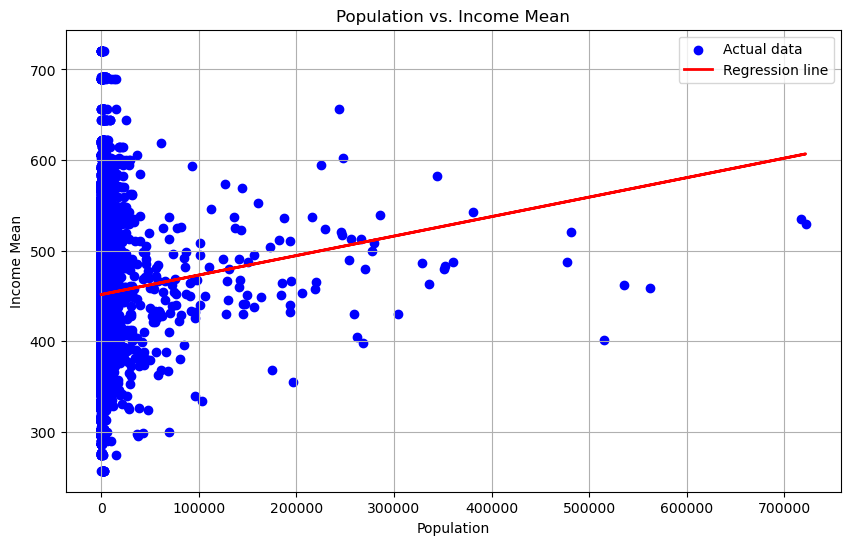

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# `merged_data` の `population` 列を数値に変換
merged_data['population'] = pd.to_numeric(merged_data['population'], errors='coerce')
merged_data = merged_data.dropna(subset=['population', 'income_mean'])

# データの確認
print(merged_data[['population', 'income_mean']].head())

# 説明変数と目的変数を設定
X = merged_data[['population']]  # 説明変数
y = merged_data['income_mean']   # 目的変数

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルの作成と学習
model = LinearRegression()
model.fit(X_train, y_train)

# テストデータを使って予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 結果の可視化
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression line')
plt.xlabel('Population')
plt.ylabel('Income Mean')
plt.title('Population vs. Income Mean')
plt.legend()
plt.grid(True)
plt.show()


Random Forest - Mean Squared Error: 3217.193450195909
Random Forest - R-squared: 0.00019814005460039308


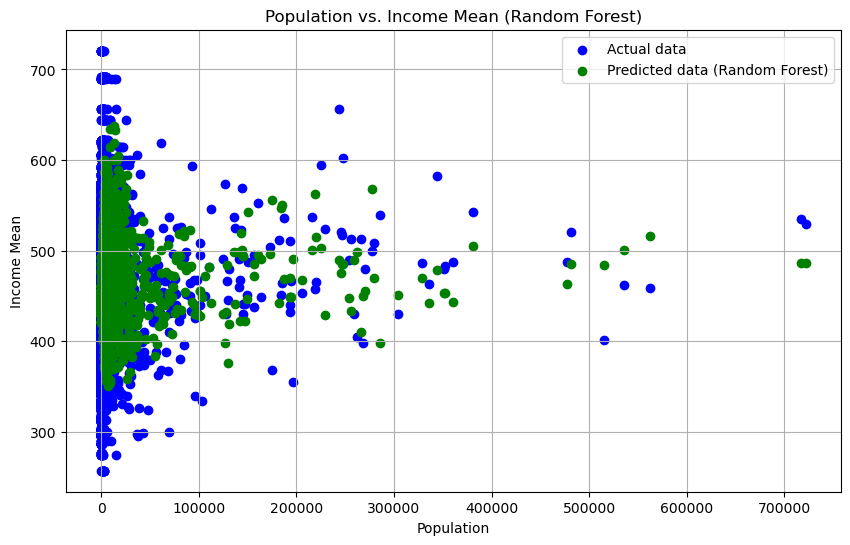

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# データの前処理
merged_data['population'] = pd.to_numeric(merged_data['population'], errors='coerce')
merged_data = merged_data.dropna(subset=['population', 'income_mean'])

# 説明変数と目的変数を設定
X = merged_data[['population']]  # 説明変数
y = merged_data['income_mean']   # 目的変数

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ランダムフォレストモデルの作成と学習
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# テストデータを使って予測
y_pred_rf = rf_model.predict(X_test)

# モデルの評価
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest - Mean Squared Error: {mse_rf}")
print(f"Random Forest - R-squared: {r2_rf}")

# 結果の可視化
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual data')
plt.scatter(X_test, y_pred_rf, color='green', label='Predicted data (Random Forest)')
plt.xlabel('Population')
plt.ylabel('Income Mean')
plt.title('Population vs. Income Mean (Random Forest)')
plt.legend()
plt.grid(True)
plt.show()


In [16]:
# `gender_data` から `population` 列を抽出し、数値に変換
gender_data['population'] = pd.to_numeric(gender_data['population'], errors='coerce')
gender_data = gender_data.dropna(subset=['population'])

# `income_data` から `income_mean` 列を抽出し、数値に変換
income_data['income_mean'] = pd.to_numeric(income_data['income_mean'], errors='coerce')
income_data = income_data.dropna(subset=['income_mean'])

# データの確認
print(gender_data.head())
print(income_data.head())

# 説明変数と目的変数の設定（ここではデータのマージをせず、個別に処理）
# ここでは一例として `gender_data` の最初の1000行を使用して `income_data` と同様に設定
X = gender_data[['population']].head(1000)  # 説明変数
y = income_data['income_mean'].head(1000)   # 目的変数

# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 線形回帰モデルの作成
model = LinearRegression()
model.fit(X_train, y_train)

# 予測
y_pred = model.predict(X_test)

# モデルの評価
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

   district_id  district2_id  level_identifier state_name city_name  \
0        18201           NaN                 1        福井県       福井市   
1        18201          10.0                 2        福井県       福井市   
3        18201          40.0                 2        福井県       福井市   
4        18201        4001.0                 3        福井県       福井市   
5        18201        4002.0                 3        福井県       福井市   

  district_name district2_name  population male_population female_population  \
0           NaN            NaN    265904.0          128892            137012   
1           明里町            NaN       386.0             191               195   
3            足羽            NaN      2881.0            1382              1499   
4            足羽            １丁目       771.0             375               396   
5            足羽            ２丁目       653.0             301               352   

  family_count  
0        99872  
1          193  
3         1178  
4          314  
5      

考察
今回、国勢調査の小地域集計データのうち、地域ごとの人口分布によってその地域の収入を推定することを考えました。
使用したデータの前処理について説明します。
各集計データから、共通キー（'district_id', 'district2_id', 'level_identifier', 'state_name', 'city_name', 'district_name', 'district2_name'）を抜き出し、マージしました。
また、merged_data と income_data を district_id と area_code を使用して左結合 (left join) しました。これにより、merged_data の district_id 列が income_data の area_code と一致する場合、その行に income_mean 列が追加され、一致しない場合、income_mean 列には NaN が挿入されました。

次にmerged_data データフレームの population 列と income_mean 列のデータを数値に変換する処理と欠損値に対する処理を行い、そのデータを用いて、線形回帰モデルとランダムフォレストによる学習とモデル評価を行いました。

今回学習したモデルでは、結合したデータから、説明変数と目的変数を以下のように設定しました。
X = merged_data[['population']]  # 説明変数
y = merged_data['income_mean']   # 目的変数

テストデータによる予測は以下のようになりました。
線形回帰モデル
Mean Squared Error: 3210.633362867589
R-squared: 0.0022368074875018795

ランダムフォレスト
Random Forest - Mean Squared Error: 3217.193450195909
Random Forest - R-squared: 0.00019814005460039308

また、線形回帰モデルを使用して、説明変数と目的変数を個別に処理を行った予測結果
Mean Squared Error: 3756.404903537523
R-squared: 0.0002351761463077473
Coefficient: 6.319388427076771e-05
Intercept: 449.61664757458436

評価指標について
Mean Squared Error (MSE):
これは予測値と実際の値の差の二乗の平均です。この値が高いほど、モデルの精度が低いことを意味します。
今回の予測では、MSE は 3210.63 、3217.19となっており、予測精度はあまり高くない結果となりました。

R²は、モデルがデータの分散をどれだけ説明できるかを示す指標であり、R² の値が 0 に近いということは、モデルが説明変数 population によって目的変数 income_mean を説明できていないことが言えます。

今回の予測では、どちらも 0.002 であり、population と income_meanの相関を説明できていないと考えられます。


要因の検討）
まず、population と income_mean の間に強い相関がない可能性があり、この場合は、他の説明変数を追加するか、より適切な変数を選定する必要があるかもしれません。
また、今回、結合したデータの範囲に関しては、income_mean がほぼ同じ値に集中していたため、抽出されたデータが不均一である可能性やincome_mean に対する説明変数の影響が小さいことが考えられます。

改善点）
・他の説明変数を追加する:merged_data に他の潜在的な説明変数（例えば、住宅データや雇用状況など）を追加し、複数の説明変数を用いてモデルを作成して改善する必要性があると考えました。
・データの再確認: income_mean の分布を確認し、データに偏りがないかどうかを調べ、極端な値を除外する前処理を追加をすることで、学習の精度が改善される可能性が考えられます。
以上ような改善を行い、モデルの再評価を行うことで、予測精度の向上が見込めると考えられます。 
今後は、他のモデルリッジ回帰や様々なモデルを試して、適切な予測が可能となるモデルの構築を検討していきたいです。

